# Чисельне розв'язання дифереціальних рівнянь

In [116]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [117]:
t_arr = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
y_0 = 1
def func(t, y):
    return (y*t + 1)/(1+t*t)

In [119]:
t = symbols('t')

# Точний розв'язок

In [120]:
def solution(t):
    return t + np.sqrt(1+t*t)

In [121]:
solution(t_arr)

array([1.        , 1.05124922, 1.10498756, 1.16118742, 1.2198039 ,
       1.28077641, 1.34403065, 1.40948101, 1.47703296, 1.54658561,
       1.61803399])

# Метод Ейлера

In [122]:
def euler_method(function, t_array, initial_condition):
    y_array = [initial_condition]
    tau = t_array[1] - t_array[0]
    for i in np.arange(np.size(t_array)-1):
        y_array.append(y_array[i] + tau*function(t_array[i], y_array[i]))
    return np.array(y_array)

In [123]:
y_euler = euler_method(func, t_arr, y_0)

In [124]:
y_euler

array([1.        , 1.05      , 1.10249377, 1.15745661, 1.21484626,
       1.2746044 , 1.33665857, 1.40092451, 1.46730864, 1.53571051,
       1.60602526])

In [126]:
print(f"Похибка = {np.max(np.abs(y_euler - solution(t_arr)))}")

Похибка = 0.012008728750892761


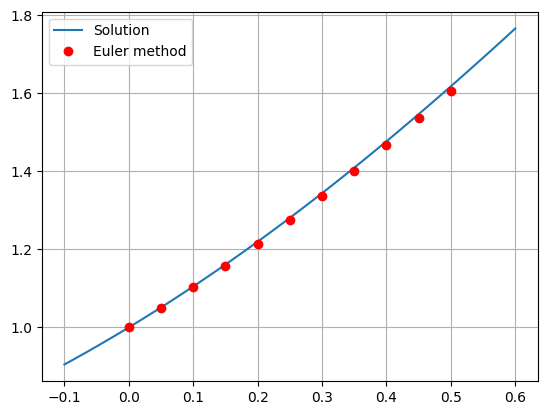

In [127]:
arg = np.linspace(-0.1, 0.6, 100)
plt.plot(arg, solution(arg), label = "Solution")
plt.plot(t_arr, y_euler, "ro", label = "Euler method")
plt.grid()
plt.legend()
plt.show()

# Тристадійний метод Рунге-Кутти

In [128]:
def runge3_method(function, t_array, initial_condition):
    y_array = [initial_condition]
    tau = t_array[1] - t_array[0]
    for i in np.arange(np.size(t_array)-1):
        K1 = function(t_array[i], y_array[i])
        K2 = function(t_array[i] + tau/2, y_array[i] + tau*K1/2)
        K3 = function(t_array[i] + tau/2, y_array[i] - tau*K1 + 2*tau*K2)
        y_array.append(y_array[i] + (tau/6)*(K1 + 4*K2 + K3))
    return np.array(y_array)

In [129]:
y_runge3 = runge3_method(func, t_arr, y_0)

In [130]:
y_runge3

array([1.        , 1.05104674, 1.10459531, 1.16061941, 1.21907525,
       1.2799031 , 1.34302929, 1.40836858, 1.47582658, 1.5453023 ,
       1.6166905 ])

In [132]:
print(f"Похибка = {np.max(np.abs(y_runge3 - solution(t_arr)))}")

Похибка = 0.0013434873874704767


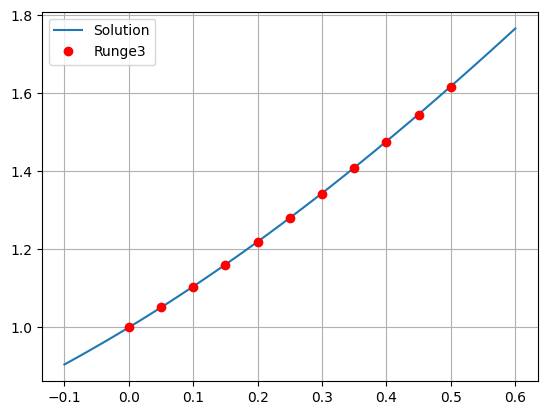

In [133]:
arg = np.linspace(-0.1, 0.6, 100)
plt.plot(arg, solution(arg), label = "Solution")
plt.plot(t_arr, y_runge3, "ro", label = "Runge3")
plt.grid()
plt.legend()
plt.show()

# Метод Рунге-Кутти четвертого порядку точності

In [134]:
def runge4_method(function, t_array, initial_condition):
    y_array = [initial_condition]
    tau = t_array[1] - t_array[0]
    for i in np.arange(np.size(t_array)-1):
        K1 = function(t_array[i], y_array[i])
        K2 = function(t_array[i] + tau/2, y_array[i] + tau*K1/2)
        K3 = function(t_array[i] + tau/2, y_array[i] + tau*K2/2)
        K4 = function(t_array[i] + tau, y_array[i] + tau*K3)
        y_array.append(y_array[i] + (tau/6)*(K1 + 2*K2 + 2*K3 + K4))
    return np.array(y_array)

In [135]:
y_runge4 = runge4_method(func, t_arr, y_0)

In [136]:
y_runge4

array([1.        , 1.05124922, 1.10498756, 1.16118742, 1.21980391,
       1.28077641, 1.34403066, 1.40948102, 1.47703297, 1.54658563,
       1.61803401])

In [138]:
print(f"Похибка = {np.max(np.abs(y_runge4 - solution(t_arr)))}")

Похибка = 1.687034911768137e-08


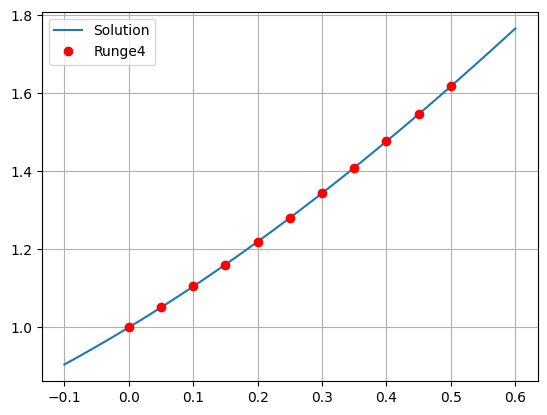

In [139]:
arg = np.linspace(-0.1, 0.6, 100)
plt.plot(arg, solution(arg), label = "Solution")
plt.plot(t_arr, y_runge4, "ro", label = "Runge4")
plt.grid()
plt.legend()
plt.show()

# 

# Метод прогнозу-корекції Мілна

In [158]:
def miln_method(function, t_array, initial_condition):
    y_array = [initial_condition]
    tau = t_array[1] - t_array[0]
    for i in np.arange(3):
        y_array.append(y_array[i] + tau*function(t_array[i], y_array[i]))
    for i in np.arange(3, np.size(t_array) - 1):
        prediction = y_array[i-3] + (4*tau)/3*(2*function(t_array[i-2], y_array[i-2]) - function(t_array[i-1], y_array[i-1]) + 2*function(t_array[i], y_array[i]))
        y_array.append(y_array[i-1] + tau/3*(function(t_array[i-1], y_array[i-1])+ 4*function(t_array[i], y_array[i]) + function(t_array[i+1], prediction)))
    return np.array(y_array)

In [160]:
y_miln = miln_method(func, t_arr, y_0)

In [161]:
y_miln

array([1.        , 1.05      , 1.10249377, 1.15745661, 1.21726932,
       1.27699886, 1.34141654, 1.40562078, 1.47431074, 1.54261833,
       1.61517777])

In [162]:
print(f"Похибка = {np.max(np.abs(y_miln - solution(t_arr)))}")

Похибка = 0.003967279100392185


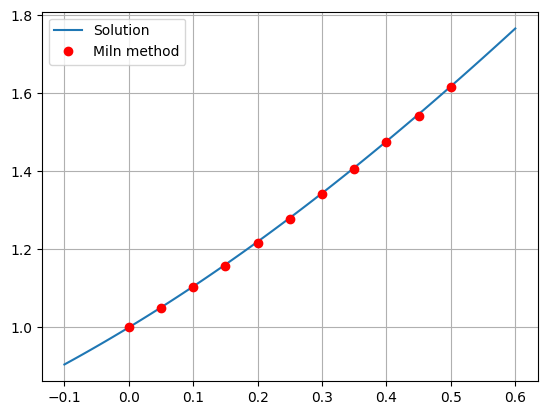

In [163]:
arg = np.linspace(-0.1, 0.6, 100)
plt.plot(arg, solution(arg), label = "Solution")
plt.plot(t_arr, y_miln, "ro", label = "Miln method")
plt.grid()
plt.legend()
plt.show()

# Метод Адамса четвертого порядку

In [170]:
def adams_method(function, t_array, initial_condition):
    y_array = [initial_condition]
    tau = t_array[1] - t_array[0]
    for i in np.arange(3):
        y_array.append(y_array[i] + tau*function(t_array[i], y_array[i]))
    for i in np.arange(3, np.size(t_array) - 1):
        prediction = y_array[i] + tau/24*(55*function(t_array[i], y_array[i]) - 59*function(t_array[i-1], y_array[i-1]) + 37*function(t_array[i-2], y_array[i-2]) - 9*function(t_array[i-3], y_array[i-3]))
        y_array.append(y_array[i] + tau/24*(9*function(t_array[i+1], prediction) + 19*function(t_array[i], y_array[i]) - 5*function(t_array[i-1], y_array[i-1]) + function(t_array[i-2], y_array[i-2])))
    return np.array(y_array)

In [171]:
y_adams = adams_method(func, t_arr, y_0)

In [172]:
y_adams

array([1.        , 1.05      , 1.10249377, 1.15745661, 1.21604032,
       1.27697267, 1.34017805, 1.40557145, 1.4730587 , 1.54253925,
       1.61390854])

In [173]:
print(f"Похибка = {np.max(np.abs(y_adams - solution(t_arr)))}")

Похибка = 0.004125453655584588


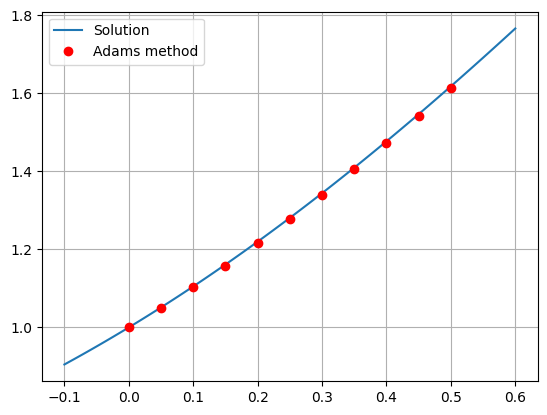

In [174]:
arg = np.linspace(-0.1, 0.6, 100)
plt.plot(arg, solution(arg), label = "Solution")
plt.plot(t_arr, y_adams, "ro", label = "Adams method")
plt.grid()
plt.legend()
plt.show()